Taking package from https://github.com/PokemonTCG/pokemon-tcg-sdk-python

In [1]:
pip install pokemontcgsdk

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pokemontcgsdk import Card
from pokemontcgsdk import Set
from pokemontcgsdk import Type
from pokemontcgsdk import Supertype
from pokemontcgsdk import Subtype
from pokemontcgsdk import Rarity

In [3]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from matplotlib import pyplot

%matplotlib inline

import json
from dataclasses import asdict

In [93]:
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve
from sklearn.metrics import precision_recall_fscore_support,f1_score,fbeta_score
from sklearn.metrics import classification_report, plot_roc_curve, plot_confusion_matrix, recall_score, make_scorer
from sklearn.linear_model import LogisticRegression 
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import make_scorer, r2_score, mean_squared_error

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import XGBRegressor

# Data Preparation

## Data Gathering

In [5]:
# Filter cards via query parameters
sample_cards = Card.where(q='set.name:generations subtypes:mega')
print(sample_cards)

[Card(abilities=None, artist='5ban Graphics', ancientTrait=None, attacks=[Attack(name='Bloom Buster', cost=['Grass', 'Grass', 'Colorless', 'Colorless'], convertedEnergyCost=4, damage='130', text="Flip a coin. If heads, this attack does 30 damage to each of your opponent's Benched Pokémon. (Don't apply Weakness and Resistance for Benched Pokémon.)")], cardmarket=Cardmarket(url='https://prices.pokemontcg.io/cardmarket/g1-2', updatedAt='2021/08/31', prices=CardmarketPrices(averageSellPrice=8.39, lowPrice=4.2, trendPrice=7.69, germanProLow=None, suggestedPrice=None, reverseHoloSell=None, reverseHoloLow=None, reverseHoloTrend=8.37, lowPriceExPlus=7.5, avg1=7.77, avg7=8.29, avg30=8.35, reverseHoloAvg1=7.49, reverseHoloAvg7=6.75, reverseHoloAvg30=7.59)), convertedRetreatCost=4, evolvesFrom='Venusaur-EX', flavorText=None, hp='230', id='g1-2', images=CardImage(small='https://images.pokemontcg.io/g1/2.png', large='https://images.pokemontcg.io/g1/2_hires.png'), legalities=Legality(unlimited='Lega

In [6]:
# Easier to see format

json_object = asdict(sample_cards[0])

json_formatted_str = json.dumps(json_object, indent=2)

print(json_formatted_str)

{
  "abilities": null,
  "artist": "5ban Graphics",
  "ancientTrait": null,
  "attacks": [
    {
      "name": "Bloom Buster",
      "cost": [
        "Grass",
        "Grass",
        "Colorless",
        "Colorless"
      ],
      "convertedEnergyCost": 4,
      "damage": "130",
      "text": "Flip a coin. If heads, this attack does 30 damage to each of your opponent's Benched Pok\u00e9mon. (Don't apply Weakness and Resistance for Benched Pok\u00e9mon.)"
    }
  ],
  "cardmarket": {
    "url": "https://prices.pokemontcg.io/cardmarket/g1-2",
    "updatedAt": "2021/08/31",
    "prices": {
      "averageSellPrice": 8.39,
      "lowPrice": 4.2,
      "trendPrice": 7.69,
      "germanProLow": null,
      "suggestedPrice": null,
      "reverseHoloSell": null,
      "reverseHoloLow": null,
      "reverseHoloTrend": 8.37,
      "lowPriceExPlus": 7.5,
      "avg1": 7.77,
      "avg7": 8.29,
      "avg30": 8.35,
      "reverseHoloAvg1": 7.49,
      "reverseHoloAvg7": 6.75,
      "reverseHoloAv

In [7]:
# Pull all data of ALL cards
cards = Card.all()

In [8]:
card_list = []

for card in range(0, len(cards)):
    card_list.append(asdict(cards[card]))

In [56]:
# Create Dataframe with specific fields
FIELDS = ["id", "name", "set.name","set.releaseDate","supertype","subtypes","rarity","cardmarket.prices.averageSellPrice",
          "cardmarket.prices.avg1", "cardmarket.prices.avg7", "cardmarket.prices.avg30"]

card_df = pd.json_normalize(card_list)

display(card_df[FIELDS])

,id,name,set.name,set.releaseDate,supertype,subtypes,rarity,cardmarket.prices.averageSellPrice,cardmarket.prices.avg1,cardmarket.prices.avg7,cardmarket.prices.avg30
0,pl3-1,Absol G,Supreme Victors,2009/08/19,Pokémon,[Basic],Rare Holo,3.93,0.80,3.78,3.14
1,ex12-1,Aerodactyl,Legend Maker,2006/02/01,Pokémon,[Stage 1],Rare Holo,7.12,2.50,9.14,6.64
2,xy5-1,Weedle,Primal Clash,2015/02/04,Pokémon,[Basic],Common,0.06,0.05,0.05,0.06
3,mcd19-1,Caterpie,McDonald's Collection 2019,2019/10/15,Pokémon,[Basic],Promo,0.95,0.95,0.90,1.09
4,ex7-1,Azumarill,Team Rocket Returns,2004/11/01,Pokémon,[Stage 1],Rare Holo,3.20,4.00,3.20,2.87
...,...,...,...,...,...,...,...,...,...,...,...
13930,swshp-SWSH127,Eevee,SWSH Black Star Promos,2019/11/15,Pokémon,[Basic],Promo,2.54,3.06,2.68,2.54
13931,swshp-SWSH128,Eiscue,SWSH Black Star Promos,2019/11/15,Pokémon,[Basic],Promo,0.52,0.44,0.52,0.52
13932,swshp-SWSH129,Umbreon,SWSH Black Star Promos,2019/11/15,Pokémon,[Stage 1],Promo,2.07,2.06,2.05,2.05
13933,swshp-SWSH130,Ice Rider Calyrex V,SWSH Black Star Promos,2019/11/15,Pokémon,"[Basic, V]",Promo,2.56,1.88,2.77,2.60


## Data Cleaning

In [57]:
df = card_df.copy()[FIELDS]

In [58]:
df.rename(columns={'name':'card_name', 'set.name':'set_name','supertype':'card_type','subtypes':'subtype','cardmarket.prices.averageSellPrice':'avg_price','set.releaseDate':'release_date','cardmarket.prices.avg1':'1_day_$_avg','cardmarket.prices.avg7':'7_day_$_avg', 'cardmarket.prices.avg30':'30_day_$_avg'}, inplace=True)

In [59]:
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y/%m/%d')

In [60]:
df

,id,card_name,set_name,release_date,card_type,subtype,rarity,avg_price,1_day_$_avg,7_day_$_avg,30_day_$_avg
0,pl3-1,Absol G,Supreme Victors,2009-08-19,Pokémon,[Basic],Rare Holo,3.93,0.80,3.78,3.14
1,ex12-1,Aerodactyl,Legend Maker,2006-02-01,Pokémon,[Stage 1],Rare Holo,7.12,2.50,9.14,6.64
2,xy5-1,Weedle,Primal Clash,2015-02-04,Pokémon,[Basic],Common,0.06,0.05,0.05,0.06
3,mcd19-1,Caterpie,McDonald's Collection 2019,2019-10-15,Pokémon,[Basic],Promo,0.95,0.95,0.90,1.09
4,ex7-1,Azumarill,Team Rocket Returns,2004-11-01,Pokémon,[Stage 1],Rare Holo,3.20,4.00,3.20,2.87
...,...,...,...,...,...,...,...,...,...,...,...
13930,swshp-SWSH127,Eevee,SWSH Black Star Promos,2019-11-15,Pokémon,[Basic],Promo,2.54,3.06,2.68,2.54
13931,swshp-SWSH128,Eiscue,SWSH Black Star Promos,2019-11-15,Pokémon,[Basic],Promo,0.52,0.44,0.52,0.52
13932,swshp-SWSH129,Umbreon,SWSH Black Star Promos,2019-11-15,Pokémon,[Stage 1],Promo,2.07,2.06,2.05,2.05
13933,swshp-SWSH130,Ice Rider Calyrex V,SWSH Black Star Promos,2019-11-15,Pokémon,"[Basic, V]",Promo,2.56,1.88,2.77,2.60


In [61]:
# Checking for missing data
df.isna().sum()

id                0
card_name         0
set_name          0
release_date      0
card_type         0
subtype         188
rarity           77
avg_price       515
1_day_$_avg     102
7_day_$_avg     102
30_day_$_avg    102
dtype: int64

In [62]:
null_data = df[df.isnull().any(axis=1)]
null_data

,id,card_name,set_name,release_date,card_type,subtype,rarity,avg_price,1_day_$_avg,7_day_$_avg,30_day_$_avg
6,ru1-1,Venusaur,Pokémon Rumble,2009-12-02,Pokémon,[Stage 2],None,NaN,20.00,24.64,11.40
33,ru1-2,Cherrim,Pokémon Rumble,2009-12-02,Pokémon,[Stage 1],None,NaN,14.99,5.37,2.10
52,si1-1,Mew,Southern Islands,2001-07-31,Pokémon,[Basic],None,61.25,64.99,79.22,44.62
60,si1-2,Pidgeot,Southern Islands,2001-07-31,Pokémon,[Stage 2],None,12.80,9.99,18.42,14.51
81,ru1-3,Ninetales,Pokémon Rumble,2009-12-02,Pokémon,[Stage 1],None,NaN,7.99,12.35,4.23
...,...,...,...,...,...,...,...,...,...,...,...
13849,swsh7-165,Treasure Energy,Evolving Skies,2021-08-27,Energy,None,Uncommon,0.14,0.05,0.14,0.14
13888,swsh7-204,Leafeon VMAX,Evolving Skies,2021-08-27,Pokémon,[VMAX],Rare Rainbow,NaN,NaN,NaN,NaN
13919,swsh7-235,Lightning Energy,Evolving Skies,2021-08-27,Energy,None,Rare Secret,36.21,42.48,42.48,42.48
13920,swsh7-236,Darkness Energy,Evolving Skies,2021-08-27,Energy,None,Rare Secret,25.34,27.49,26.22,26.22


In [63]:
# Average Sell Price is top data category. 
# Cannot be calculated based on day averages as it is the all time value
# Dropping rows with missing

df.dropna(subset=['avg_price','rarity','subtype','1_day_$_avg','7_day_$_avg','30_day_$_avg'], inplace = True)

In [64]:
# Checking for missing data
df.isna().sum()

id              0
card_name       0
set_name        0
release_date    0
card_type       0
subtype         0
rarity          0
avg_price       0
1_day_$_avg     0
7_day_$_avg     0
30_day_$_avg    0
dtype: int64

In [65]:
# Cleaned data
df

,id,card_name,set_name,release_date,card_type,subtype,rarity,avg_price,1_day_$_avg,7_day_$_avg,30_day_$_avg
0,pl3-1,Absol G,Supreme Victors,2009-08-19,Pokémon,[Basic],Rare Holo,3.93,0.80,3.78,3.14
1,ex12-1,Aerodactyl,Legend Maker,2006-02-01,Pokémon,[Stage 1],Rare Holo,7.12,2.50,9.14,6.64
2,xy5-1,Weedle,Primal Clash,2015-02-04,Pokémon,[Basic],Common,0.06,0.05,0.05,0.06
3,mcd19-1,Caterpie,McDonald's Collection 2019,2019-10-15,Pokémon,[Basic],Promo,0.95,0.95,0.90,1.09
4,ex7-1,Azumarill,Team Rocket Returns,2004-11-01,Pokémon,[Stage 1],Rare Holo,3.20,4.00,3.20,2.87
...,...,...,...,...,...,...,...,...,...,...,...
13930,swshp-SWSH127,Eevee,SWSH Black Star Promos,2019-11-15,Pokémon,[Basic],Promo,2.54,3.06,2.68,2.54
13931,swshp-SWSH128,Eiscue,SWSH Black Star Promos,2019-11-15,Pokémon,[Basic],Promo,0.52,0.44,0.52,0.52
13932,swshp-SWSH129,Umbreon,SWSH Black Star Promos,2019-11-15,Pokémon,[Stage 1],Promo,2.07,2.06,2.05,2.05
13933,swshp-SWSH130,Ice Rider Calyrex V,SWSH Black Star Promos,2019-11-15,Pokémon,"[Basic, V]",Promo,2.56,1.88,2.77,2.60


## Feature Engineering

In [66]:
# Setting index
df.set_index('id', inplace=True)

In [67]:
# Sort by Release Date
df = df.sort_values(by='release_date')

In [68]:
# Cardmarket prices are in euros need to convert values to US Dollar
df['avg_price'] = df['avg_price'] * 1.18
df['1_day_$_avg'] = df['1_day_$_avg'] * 1.18
df['7_day_$_avg'] = df['7_day_$_avg'] * 1.18
df['30_day_$_avg'] = df['30_day_$_avg'] * 1.18

# Round to 2 digit decimals
df = df.round(decimals=2)
df

,card_name,set_name,release_date,card_type,subtype,rarity,avg_price,1_day_$_avg,7_day_$_avg,30_day_$_avg
id,,,,,,,,,,
base1-3,Chansey,Base,1999-01-09,Pokémon,[Basic],Rare Holo,25.63,17.11,47.38,24.34
base1-53,Magnemite,Base,1999-01-09,Pokémon,[Basic],Common,1.17,0.08,0.72,1.25
base1-12,Ninetales,Base,1999-01-09,Pokémon,[Stage 1],Rare Holo,16.35,12.31,34.93,15.86
base1-56,Onix,Base,1999-01-09,Pokémon,[Basic],Common,1.26,1.06,1.27,1.20
base1-35,Magikarp,Base,1999-01-09,Pokémon,[Basic],Uncommon,3.26,0.65,1.85,2.82
...,...,...,...,...,...,...,...,...,...,...
swsh7-87,Boldore,Evolving Skies,2021-08-27,Pokémon,[Stage 1],Uncommon,0.05,0.05,0.04,0.04
swsh7-88,Gigalith,Evolving Skies,2021-08-27,Pokémon,[Stage 2],Rare,0.21,0.14,0.27,0.27
swsh7-89,Palpitoad,Evolving Skies,2021-08-27,Pokémon,[Stage 1],Uncommon,0.06,0.06,0.06,0.06


In [21]:
# Rarity splits
# Currently too many types

In [69]:
# Total years past since set emerged
time_df = pd.DataFrame(index=df.index.values.tolist())

from datetime import date

today = date.today()
time_df['today'] = pd.to_datetime(today)

# Year Difference
df['age_days'] = (time_df['today'] - df['release_date']).dt.days

In [70]:
df

,card_name,set_name,release_date,card_type,subtype,rarity,avg_price,1_day_$_avg,7_day_$_avg,30_day_$_avg,age_days
id,,,,,,,,,,,
base1-3,Chansey,Base,1999-01-09,Pokémon,[Basic],Rare Holo,25.63,17.11,47.38,24.34,8272
base1-53,Magnemite,Base,1999-01-09,Pokémon,[Basic],Common,1.17,0.08,0.72,1.25,8272
base1-12,Ninetales,Base,1999-01-09,Pokémon,[Stage 1],Rare Holo,16.35,12.31,34.93,15.86,8272
base1-56,Onix,Base,1999-01-09,Pokémon,[Basic],Common,1.26,1.06,1.27,1.20,8272
base1-35,Magikarp,Base,1999-01-09,Pokémon,[Basic],Uncommon,3.26,0.65,1.85,2.82,8272
...,...,...,...,...,...,...,...,...,...,...,...
swsh7-87,Boldore,Evolving Skies,2021-08-27,Pokémon,[Stage 1],Uncommon,0.05,0.05,0.04,0.04,6
swsh7-88,Gigalith,Evolving Skies,2021-08-27,Pokémon,[Stage 2],Rare,0.21,0.14,0.27,0.27,6
swsh7-89,Palpitoad,Evolving Skies,2021-08-27,Pokémon,[Stage 1],Uncommon,0.06,0.06,0.06,0.06,6


In [71]:
# Separate Subtype
# Basic
# Other
df_test = pd.DataFrame(df['subtype'].values.tolist())

display(df_test[0].value_counts())
display(df_test[1].value_counts())
display(df_test[2].value_counts())

Basic                      6610
Stage 1                    3345
Stage 2                    1119
Supporter                   595
Item                        546
Pokémon Tool                217
Stadium                     169
Special                     161
VMAX                        138
MEGA                         77
Level-Up                     75
BREAK                        31
Technical Machine            24
Baby                         19
LEGEND                       18
Restored                     13
Rocket's Secret Machine      10
GX                            8
Goldenrod Game Corner         2
Rapid Strike                  1
Pokémon Tool F                1
Single Strike                 1
Name: 0, dtype: int64

EX               525
GX               441
V                304
TAG TEAM         110
Rapid Strike      79
Single Strike     77
Pokémon Tool       9
Item               2
Name: 1, dtype: int64

GX               110
Single Strike     26
Rapid Strike      25
Pokémon Tool       2
Name: 2, dtype: int64

In [73]:
def create_df_from_listentry(df, col_name):
    '''
    Takes a column of lists (col_name) from a dataframe (df)
    
    Returns a dataframe with number of columns equal to max list size 
    and each element of the row list in its own column  
    '''
    new_df = df[col_name].apply(pd.Series)
    new_df = new_df.rename(columns = lambda x : col_name + '_' + str(x))
    return new_df

def create_dummy_from_listentries(df, col_name):
    '''
    Takes a column of lists (col_name) from a dataframe (df)
    
    Returns a dataframe with dummy variables representing
    each unique element of the lists in aggregate
    '''
    list_df = create_df_from_listentry(df, col_name)
    df_cols = list_df.columns.tolist()
    df_dummy = pd.DataFrame()
    for col in df_cols:
        if df_dummy.empty:
            df_dummy = pd.get_dummies(list_df[col], prefix='subtype')
        else:
#            df_dummy.add(pd.get_dummies(list_df[col], prefix='subtype'))
            temp = (pd.get_dummies(list_df[col], prefix='subtype'))
            df_dummy = pd.concat([df_dummy,temp], axis=1)
            df_dummy = df_dummy.loc[:,~df_dummy.columns.duplicated()]
    return df_dummy

In [74]:
subtype_df = create_dummy_from_listentries(df, 'subtype')
subtype_df.head()

,subtype_BREAK,subtype_Baby,subtype_Basic,subtype_GX,subtype_Goldenrod Game Corner,subtype_Item,subtype_LEGEND,subtype_Level-Up,subtype_MEGA,subtype_Pokémon Tool,...,subtype_Special,subtype_Stadium,subtype_Stage 1,subtype_Stage 2,subtype_Supporter,subtype_Technical Machine,subtype_VMAX,subtype_EX,subtype_TAG TEAM,subtype_V
id,,,,,,,,,,,,,,,,,,,,,
base1-3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
base1-53,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
base1-12,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
base1-56,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
base1-35,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
subtype_df.loc['swsh6-88']

subtype_BREAK                      0
subtype_Baby                       0
subtype_Basic                      1
subtype_GX                         0
subtype_Goldenrod Game Corner      0
subtype_Item                       0
subtype_LEGEND                     0
subtype_Level-Up                   0
subtype_MEGA                       0
subtype_Pokémon Tool               0
subtype_Pokémon Tool F             0
subtype_Rapid Strike               0
subtype_Restored                   0
subtype_Rocket's Secret Machine    0
subtype_Single Strike              0
subtype_Special                    0
subtype_Stadium                    0
subtype_Stage 1                    0
subtype_Stage 2                    0
subtype_Supporter                  0
subtype_Technical Machine          0
subtype_VMAX                       0
subtype_EX                         0
subtype_TAG TEAM                   0
subtype_V                          0
Name: swsh6-88, dtype: uint8

# Exploring Data

In [76]:
# Rarity Count
df['rarity'].value_counts()

# common, uncommmon, rare (unfoiled)
# Rare Holo
# Rare Ultra, EX, GX, V, VMAX, X
# Rare Secret
# Promo

Common             3513
Uncommon           3376
Rare               1942
Rare Holo          1436
Promo               802
Rare Ultra          499
Rare Holo EX        305
Rare Secret         239
Rare Holo V         225
Rare Rainbow        224
Rare Holo GX        153
Rare Shiny          149
Rare Holo VMAX       69
Rare Holo LV.X       56
Rare Shiny GX        35
Rare Prime           26
Rare BREAK           26
Rare Prism Star      25
Rare Holo Star       24
LEGEND               18
Rare Shining         16
Rare ACE             13
Amazing Rare          9
Name: rarity, dtype: int64

C:\Users\leebr\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_price', ylabel='card_name'>

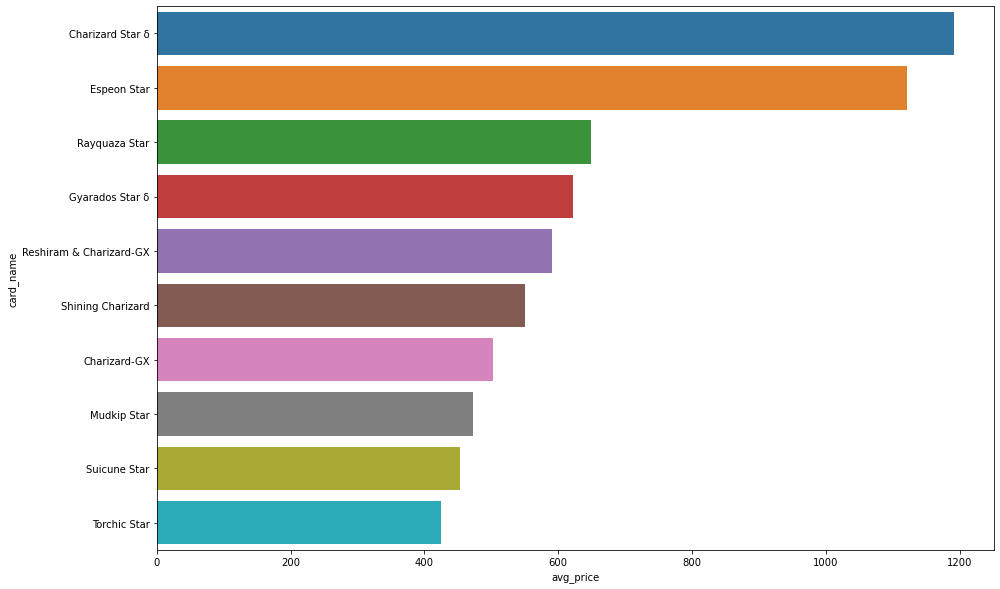

In [77]:
# Top valued cards 
fig, ax = plt.subplots(figsize=(15, 10))

y = df.nlargest(10, ['avg_price'])['card_name']
x = df.nlargest(10, ['avg_price'])['avg_price']

sns.barplot(x, y)

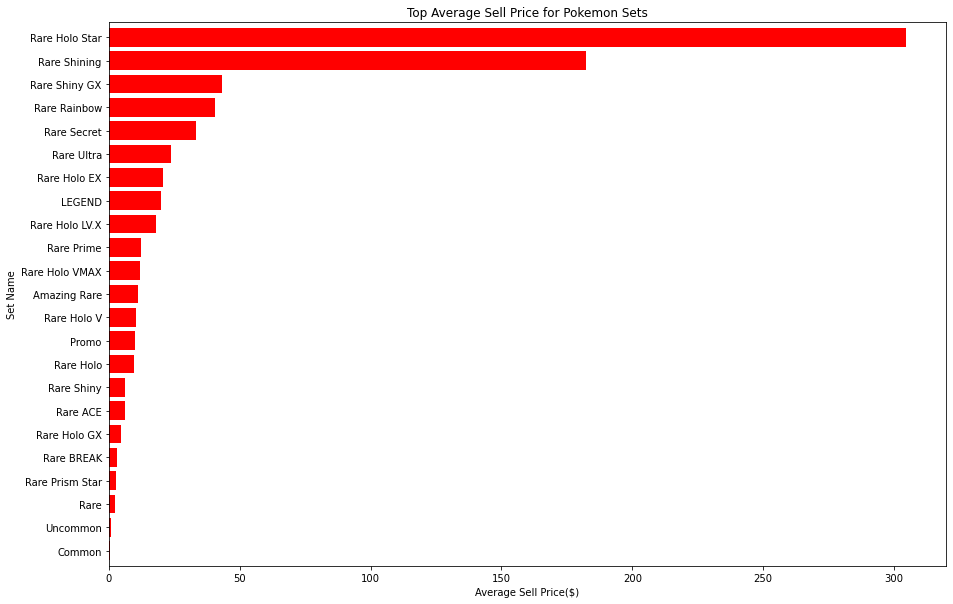

In [78]:
# Top Rarities
fig, ax = plt.subplots(figsize=(15, 10))
ax = df.groupby(['rarity'])['avg_price'].mean().sort_values().plot(kind='barh', width=0.8, color='red')
ax.set_title("Top Average Sell Price for Pokemon Sets")
ax.set_ylabel("Set Name")
ax.set_xlabel("Average Sell Price($)");

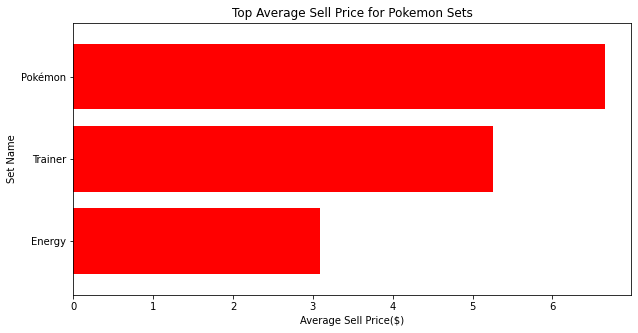

In [79]:
# Top Card Types
fig, ax = plt.subplots(figsize=(10, 5))
ax = df.groupby(['card_type'])['avg_price'].mean().sort_values().plot(kind='barh', width=0.8, color='red')
ax.set_title("Top Average Sell Price for Pokemon Sets")
ax.set_ylabel("Set Name")
ax.set_xlabel("Average Sell Price($)");

# Modeling

In [80]:
# Create blank copy for initial modeling
model_df = df.copy()

# Dropping Card Names (too many differing names), concating subtype features, release date removed
model_df.drop(columns=['card_name','set_name','release_date','subtype','1_day_$_avg','7_day_$_avg','30_day_$_avg'],inplace=True)

model_df = pd.concat([model_df,subtype_df], axis=1)
model_df.head()

,card_type,rarity,avg_price,age_days,subtype_BREAK,subtype_Baby,subtype_Basic,subtype_GX,subtype_Goldenrod Game Corner,subtype_Item,...,subtype_Special,subtype_Stadium,subtype_Stage 1,subtype_Stage 2,subtype_Supporter,subtype_Technical Machine,subtype_VMAX,subtype_EX,subtype_TAG TEAM,subtype_V
id,,,,,,,,,,,,,,,,,,,,,
base1-3,Pokémon,Rare Holo,25.63,8272,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
base1-53,Pokémon,Common,1.17,8272,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
base1-12,Pokémon,Rare Holo,16.35,8272,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
base1-56,Pokémon,Common,1.26,8272,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
base1-35,Pokémon,Uncommon,3.26,8272,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [81]:
# One hot Encoder
import category_encoders as ce

#Create object for one-hot encoding
encoder=ce.OneHotEncoder(cols=['card_type','rarity'],handle_unknown='return_nan',return_df=True,use_cat_names=True)

In [82]:
#Fit and transform Data
data_encoded = encoder.fit_transform(model_df)
data_encoded

C:\Users\leebr\anaconda3\envs\learn-env\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,card_type_Pokémon,card_type_Energy,card_type_Trainer,rarity_Rare Holo,rarity_Common,rarity_Uncommon,rarity_Rare,rarity_Promo,rarity_Rare Secret,rarity_Rare Shining,...,subtype_Special,subtype_Stadium,subtype_Stage 1,subtype_Stage 2,subtype_Supporter,subtype_Technical Machine,subtype_VMAX,subtype_EX,subtype_TAG TEAM,subtype_V
id,,,,,,,,,,,,,,,,,,,,,
base1-3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
base1-53,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
base1-12,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
base1-56,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
base1-35,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
swsh7-87,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
swsh7-88,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
swsh7-89,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [83]:
# Float to Integer
data_encoded = data_encoded.astype('int')
data_encoded

,card_type_Pokémon,card_type_Energy,card_type_Trainer,rarity_Rare Holo,rarity_Common,rarity_Uncommon,rarity_Rare,rarity_Promo,rarity_Rare Secret,rarity_Rare Shining,...,subtype_Special,subtype_Stadium,subtype_Stage 1,subtype_Stage 2,subtype_Supporter,subtype_Technical Machine,subtype_VMAX,subtype_EX,subtype_TAG TEAM,subtype_V
id,,,,,,,,,,,,,,,,,,,,,
base1-3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
base1-53,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
base1-12,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
base1-56,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
base1-35,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
swsh7-87,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
swsh7-88,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
swsh7-89,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [84]:
# Create X,y and train/test
X = data_encoded.drop(columns=['avg_price'], axis=1)
y = data_encoded['avg_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

## Decision Trees

In [100]:
# Set up initial forest
trees = DecisionTreeRegressor()
trees.fit(X_train, y_train)

DecisionTreeRegressor()

In [107]:
# Plotting feature importance of models
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(10,18))
    plt.barh(range(n_features), model.feature_importances_) 
    plt.xticks(fontsize=10, fontweight='bold')
    plt.yticks(np.arange(n_features), X_train.columns.values, fontsize=10, fontweight='bold') 
    plt.xlabel('Importance of Cause', fontsize=16, fontweight='bold' )
    plt.ylabel('Causes',fontsize=16, fontweight='bold')
    plt.grid(linestyle='--', linewidth=2, axis='x', alpha=0.3)
    plt.title("Impact of Factors on Pokemon Card Prices", fontsize=15, fontweight='bold')

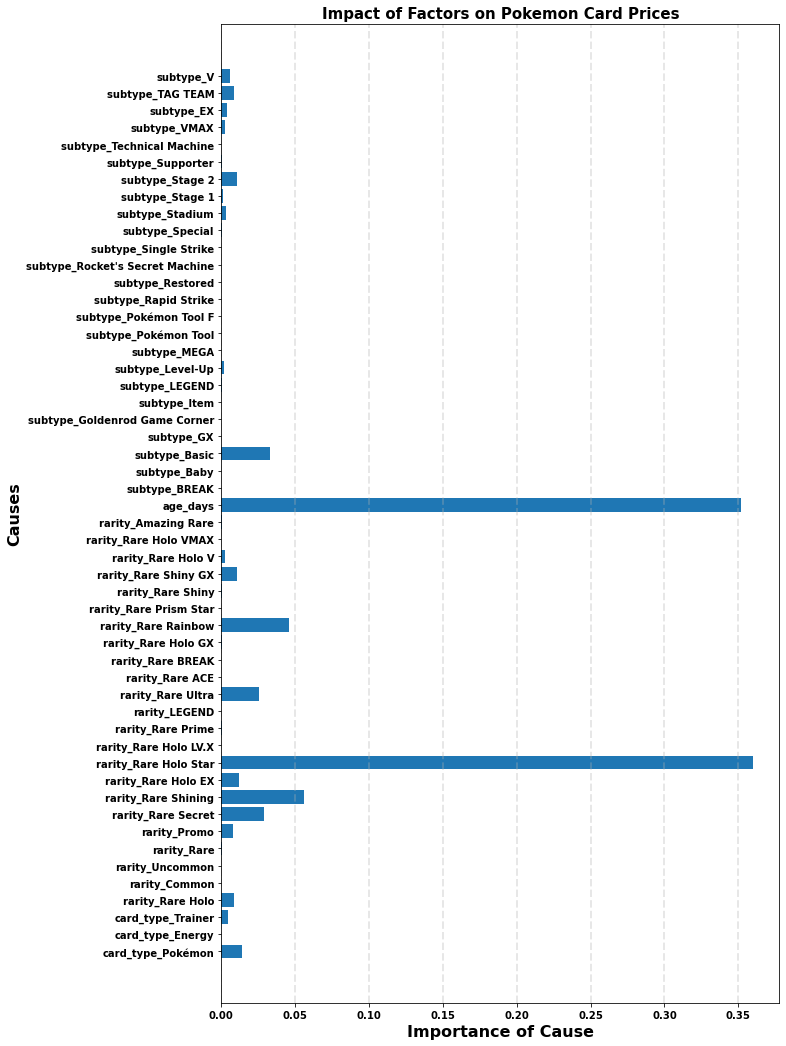

In [108]:
plot_feature_importances(trees)

In [101]:
# Test set predictions
y_hat_train = trees.predict(X_train)
y_hat_test = trees.predict(X_test)

In [89]:
# Significant score calculations
def score_cal(y_train, y_hat_train, y_test, y_hat_test):
    print(f'R^2 Score of Train: {metrics.r2_score(y_train, y_hat_train)}')
    print(f'RMSE of Train: {np.sqrt(metrics.mean_squared_error(y_train, y_hat_train))}')
    print(f'RMSE of Test: {np.sqrt(metrics.mean_squared_error(y_test, y_hat_test))}')
    print(f'Mean Absolute Error of Train: {metrics.mean_absolute_error(y_train, y_hat_train)}')
    print(f'Mean Absolute Error of Test: {metrics.mean_absolute_error(y_test, y_hat_test)}')
    return

In [90]:
score_cal(y_train, y_hat_train, y_test, y_hat_test)

R^2 Score of Train: 0.6309425467190772
RMSE of Train: 17.706606866626213
RMSE of Test: 16.549776196311505
Mean Absolute Error of Train: 3.4128953814825875
Mean Absolute Error of Test: 4.026485234750309


In [104]:
# Finding the best parameters
param_grid = {
    'max_depth': [2, 5, 10, 25, 50],
    'min_samples_split': [2, 5, 10, 20]
}

gs_trees = GridSearchCV(trees, param_grid, cv=3, scoring=make_scorer(mean_squared_error, squared=False))
gs_trees.fit(X_train, np.ravel(y_train))

gs_trees.best_params_

best_parameters = gs_trees.best_params_
                         
print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

y_hat_train = gs_trees.predict(X_train)
y_hat_test = gs_trees.predict(X_test)

# Significant score calculations
score_cal(y_train, y_hat_train, y_test, y_hat_test)

Grid Search found the following optimal parameters: 
max_depth: 25
min_samples_split: 2
R^2 Score of Train: 0.630547320557385
RMSE of Train: 17.716085393108578
RMSE of Test: 16.5502609598505
Mean Absolute Error of Train: 3.4730448084075873
Mean Absolute Error of Test: 4.061579285630537


## Random Forest

In [91]:
# Random Forest
forest = RandomForestRegressor()
forest.fit(X_train, np.ravel(y_train))

RandomForestRegressor()

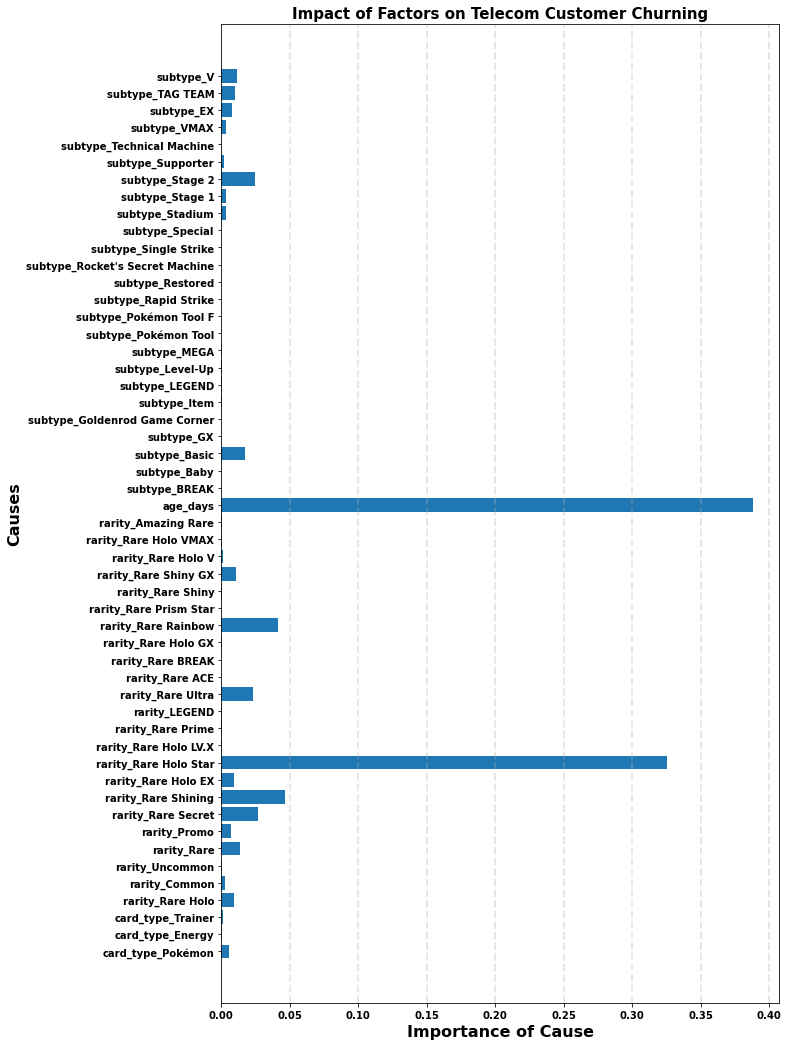

In [99]:
plot_feature_importances(forest)

In [95]:
# Finding the best parameters
param_grid = {
    'max_depth': [2, 5, 10, 25],
    'min_samples_split': [2, 5, 10, 20]
}

gs_forest = GridSearchCV(forest, param_grid, cv=3, scoring=make_scorer(mean_squared_error, squared=False))
gs_forest.fit(X_train, np.ravel(y_train))

gs_forest.best_params_

best_parameters = gs_forest.best_params_
                         
print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

y_hat_train = gs_forest.predict(X_train)
y_hat_test = gs_forest.predict(X_test)

# Significant score calculations
score_cal(y_train, y_hat_train, y_test, y_hat_test)

Grid Search found the following optimal parameters: 
max_depth: 25
min_samples_split: 2
R^2 Score of Train: 0.6118821672604148
RMSE of Train: 18.158089544980644
RMSE of Test: 16.031573552984025
Mean Absolute Error of Train: 3.6451570159577384
Mean Absolute Error of Test: 4.086753029784265


* Not overfitting

## XGBoost

In [96]:
# Instantiate XGBRegressor
xgb = XGBRegressor()

# Fit XGBRegressor
xgb.fit(X_train, np.ravel(y_train))

# Predict on training and test sets
y_hat_train = xgb.predict(X_train)
y_hat_test = xgb.predict(X_test)


# Regression Scores
score_cal(y_train, y_hat_train, y_test, y_hat_test)

R^2 Score of Train: 0.6261544393787124
RMSE of Train: 17.82109841524349
RMSE of Test: 16.287258708154756
Mean Absolute Error of Train: 3.711476240810205
Mean Absolute Error of Test: 4.115605122967989


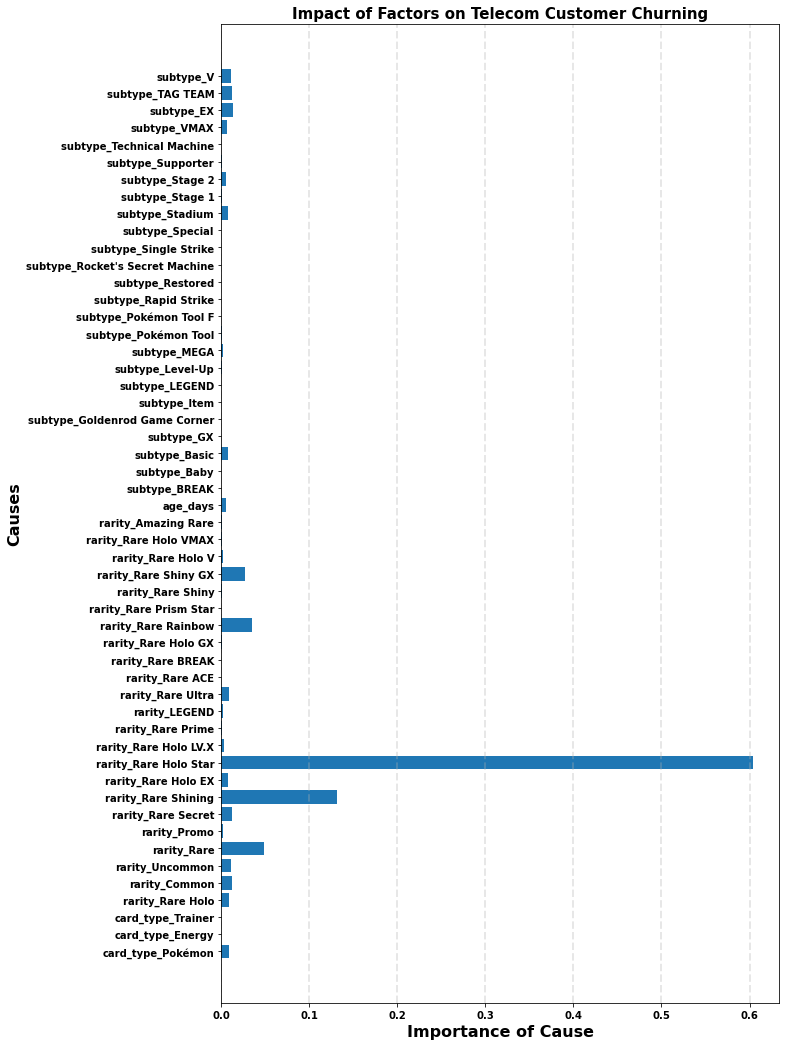

In [98]:
plot_feature_importances(xgb)

* R^2 score is good (close to 1)
* Not overfitting. Train higher than test

In [97]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [2, 3, 4],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [50, 100],
}

grid_clf = GridSearchCV(xgb, param_grid, scoring=make_scorer(mean_squared_error, squared=False))
grid_clf.fit(X_train, np.ravel(y_train))

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

y_hat_train = grid_clf.predict(X_train)
y_hat_test = grid_clf.predict(X_test)

# Significant score calculations
score_cal(y_train, y_hat_train, y_test, y_hat_test)

Grid Search found the following optimal parameters: 
learning_rate: 0.2
max_depth: 4
min_child_weight: 1
n_estimators: 100
subsample: 0.5
R^2 Score of Train: 0.5484358423849361
RMSE of Train: 19.586105349236824
RMSE of Test: 15.239359248297779
Mean Absolute Error of Train: 4.366066960620726
Mean Absolute Error of Test: 4.358125725786494


Decision trees created the best results. Highest R^2 score and lowest RMSE scores

# Results

In [110]:
df_final = pd.DataFrame(trees.feature_importances_, X.columns, columns = ['coefficient'])
df_final.head()

,coefficient
card_type_Pokémon,0.013793
card_type_Energy,0.000032
card_type_Trainer,0.004224
rarity_Rare Holo,0.008678
rarity_Common,0.000026


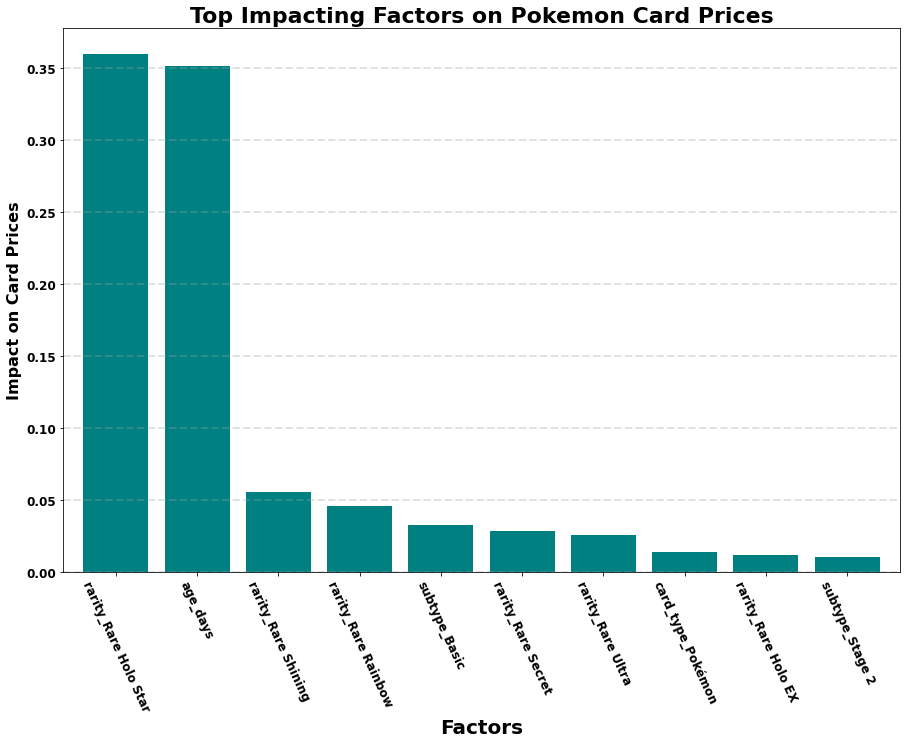

In [116]:
# Create a barplot of state's impact on churn
ax = df_final.nlargest(10, 'coefficient').plot(kind='bar', width=0.8, color = 'teal', figsize=(15,10))
ax.set_title("Top Impacting Factors on Pokemon Card Prices", fontsize = 22, fontweight = 'bold')
ax.set_xlabel("Factors", fontsize=20, fontweight='bold')
ax.set_ylabel("Impact on Card Prices", fontsize=16, fontweight='bold');
ax.get_legend().remove()

plt.xticks(rotation=-65, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.3)

* The __Rare Holo Star__ rarity and __Card Age__ have the highest positive impact on card pricing. 
* The Rare Holo Star is one of the old rarities. May be good to invest in purchasing this card type for larger future returns
* The age of the card from its first printing has the largest impact on pricing. Buying and holding on to sets have a powerful effect on pricing. 

In [117]:
df_final

,coefficient
card_type_Pokémon,1.379345e-02
card_type_Energy,3.213053e-05
card_type_Trainer,4.224122e-03
rarity_Rare Holo,8.677728e-03
rarity_Common,2.625518e-05
rarity_Uncommon,6.306059e-06
rarity_Rare,5.861401e-04
rarity_Promo,7.801757e-03
rarity_Rare Secret,2.858955e-02
rarity_Rare Shining,5.565587e-02


In [134]:
df_card_type = df_final[:3]
display(df_card_type.head())

df_rarity = df_final[3:25]
display(df_rarity.head())

df_subtype = df_final[27:]
display(df_subtype.head())

,coefficient
card_type_Pokémon,0.013793
card_type_Energy,0.000032
card_type_Trainer,0.004224


,coefficient
rarity_Rare Holo,0.008678
rarity_Common,0.000026
rarity_Uncommon,0.000006
rarity_Rare,0.000586
rarity_Promo,0.007802


,coefficient
subtype_BREAK,1.204506e-07
subtype_Baby,1.957781e-05
subtype_Basic,3.267640e-02
subtype_GX,7.515403e-05
subtype_Goldenrod Game Corner,0.000000e+00


In [135]:
# Renaming indexes
as_list = df_card_type.index.values.tolist()
as_list = [i.replace('card_type_','') for i in as_list]
df_card_type.index = as_list
df_card_type.head()

# Renaming indexes
as_list = df_rarity.index.values.tolist()
as_list = [i.replace('rarity_','') for i in as_list]
df_rarity.index = as_list
df_rarity.head()

# Renaming indexes
as_list = df_subtype.index.values.tolist()
as_list = [i.replace('subtype_','') for i in as_list]
df_subtype.index = as_list
df_subtype.head()

,coefficient
BREAK,1.204506e-07
Baby,1.957781e-05
Basic,3.267640e-02
GX,7.515403e-05
Goldenrod Game Corner,0.000000e+00


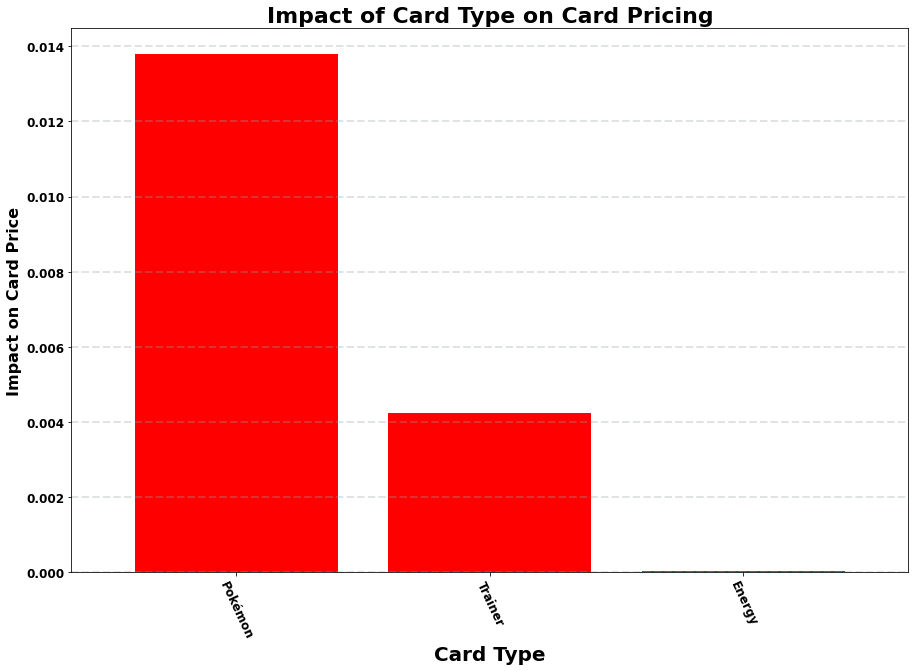

In [144]:
# Graph for impact of card type
ax = df_card_type.sort_values(by=['coefficient'], ascending=False).plot(kind='bar', width=0.8, color = 'red', figsize=(15,10))
ax.set_title("Impact of Card Type on Card Pricing", fontsize = 22, fontweight = 'bold')
ax.set_xlabel("Card Type", fontsize=20, fontweight='bold')
ax.set_ylabel("Impact on Card Price", fontsize=16, fontweight='bold');
ax.get_legend().remove()

plt.xticks(rotation=-65, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.3)

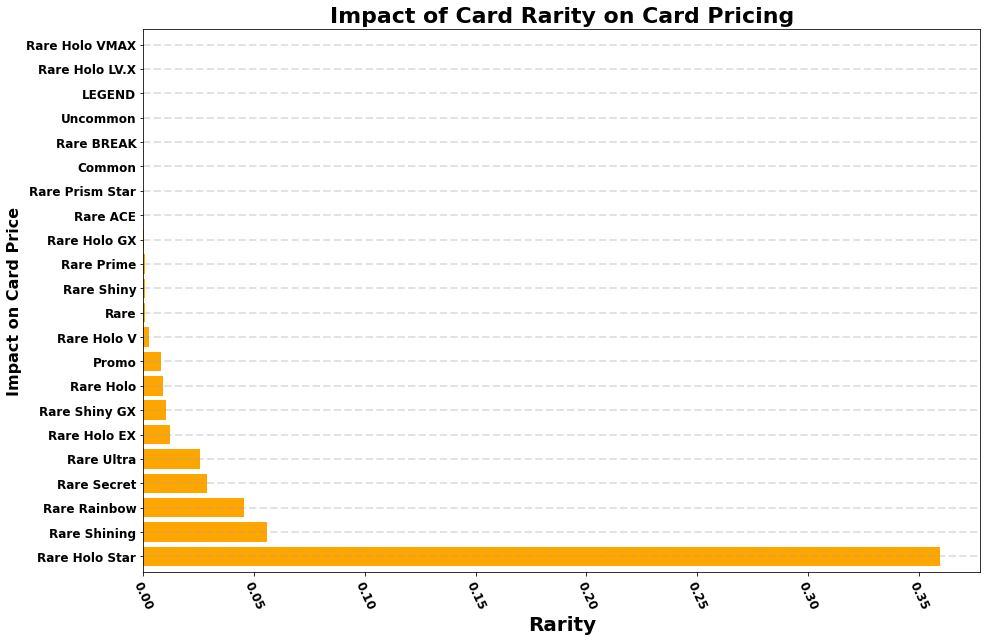

In [146]:
# Graph for impact of card rarity
ax = df_rarity.sort_values(by=['coefficient'], ascending=False).plot(kind='barh', width=0.8, color = 'orange', figsize=(15,10))
ax.set_title("Impact of Card Rarity on Card Pricing", fontsize = 22, fontweight = 'bold')
ax.set_xlabel("Rarity", fontsize=20, fontweight='bold')
ax.set_ylabel("Impact on Card Price", fontsize=16, fontweight='bold');
ax.get_legend().remove()

plt.xticks(rotation=-65, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.3)

* Excluding __Rare Holo Star__ and __Rare Shining __ rarity which are set specific rarities
* __Rare Rainbow, Rare Secret, and Rare Ultra__ have the largest influence on higher card prices.

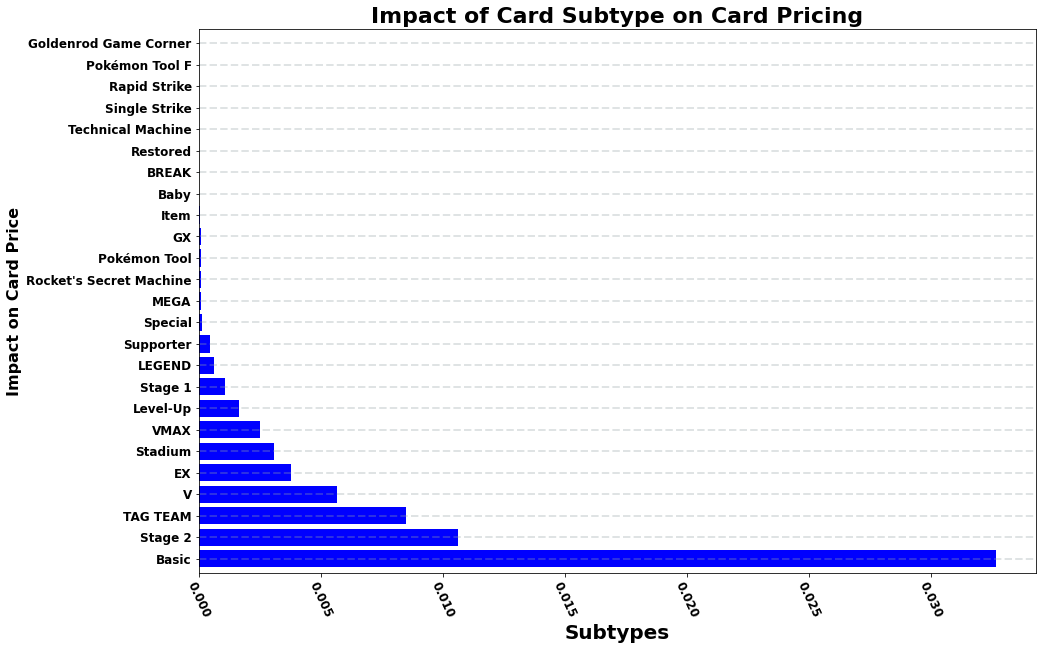

In [147]:
# Graph for impact of card subtype
ax = df_subtype.sort_values(by=['coefficient'], ascending=False).plot(kind='barh', width=0.8, color = 'blue', figsize=(15,10))
ax.set_title("Impact of Card Subtype on Card Pricing", fontsize = 22, fontweight = 'bold')
ax.set_xlabel("Subtypes", fontsize=20, fontweight='bold')
ax.set_ylabel("Impact on Card Price", fontsize=16, fontweight='bold');
ax.get_legend().remove()

plt.xticks(rotation=-65, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.3)

* Surprisingly even __Basic__ subtypes have a good effect on card pricing. 
* It is not necessary to find specific subtypes in terms of pricing return

# Conclusions

* __Pokemon card age and Rare Holo Star rarity have the largest impact on higher sell prices.__ Vintage cards are favored by Pokemon card collectors due to the scarcity of the cards. There were only 27 Gold Star rarity cards released from 2004 to 2007. They are one of the highest priced cards on the market. A PSA 10 Gold Star Espeon sold for 22,000 US dollars in February 2021. One of the oldest cards in the world was sold at 369,000 US dollars in December 2020.
* __The Pokemon card type have the highest general value.__ As the name of the series would indicate, the namesake type of card will have the highest value. 
* __Rare Rainbow, Rare Secret, and Rare Ultra have the largest influence on higher card prices in terms of Modern rarities__. Outside of specific rarities from older sets, these modern rarities still hold good value from past to present. 
* __Basic subtype held the most value.__  This can probably be explained by due to the limited subtypes on older cards. 

# Future Steps

* Create an app that can give average market price of cards.
* Predictive prices 
* Add data for graded PSA 10 Cards. Will raise the market prices